In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from vega_datasets import data

### For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

## Dataset: sf_temps

In [5]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [10]:
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


### Resample by the day and take the average temperature. Visualize the average temperature over time.

In [12]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


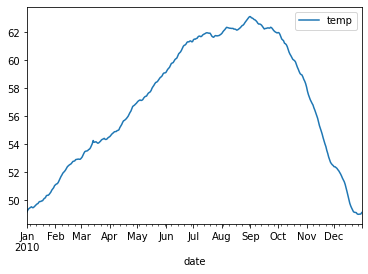

In [14]:
df.resample('D').mean().plot()
plt.show()

### Write the code necessary to visualize the minimum temperature over time.

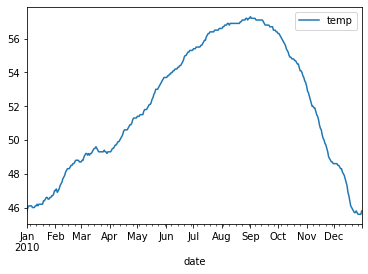

In [15]:
df.resample('D').min().plot()
plt.show()

### Write the code necessary to visualize the maximum temperature over time.

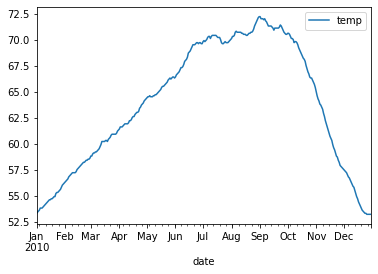

In [16]:
df.resample('D').max().plot()
plt.show()

### Which month is the coldest, on average?

In [18]:
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [26]:
df['month'] = df.index.month_name()
df.head()

,temp,month
date,,
2010-01-01 00:00:00,47.8,January
2010-01-01 01:00:00,47.4,January
2010-01-01 02:00:00,46.9,January
2010-01-01 03:00:00,46.5,January
2010-01-01 04:00:00,46.0,January


In [35]:
df.groupby('month').mean().idxmin()

temp    January
dtype: object

In [34]:
df.groupby('month').mean().sort_values('temp').head(1)

,temp
month,
January,49.98414


### Which month has the highest average temperature?

In [38]:
df.groupby('month').mean().idxmax()

temp    September
dtype: object

In [39]:
df.groupby('month').mean().max()

temp    62.487083
dtype: float64

### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [47]:
df_daily = df.resample('D').agg(['min','max'] ).temp
df_daily.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [54]:
df_daily['temp_diff'] = df_daily['max'] - df_daily['min']
df_daily.head()

,min,max,temp_diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [58]:
df_daily['month'] = df_daily.index.month_name()
df_daily

,min,max,temp_diff,month
date,,,,
2010-01-01,45.8,53.3,7.5,January
2010-01-02,46.0,53.4,7.4,January
2010-01-03,46.1,53.5,7.4,January
2010-01-04,46.1,53.6,7.5,January
2010-01-05,46.1,53.8,7.7,January
...,...,...,...,...
2010-12-27,45.6,53.2,7.6,December
2010-12-28,45.6,53.2,7.6,December
2010-12-29,45.6,53.2,7.6,December


In [64]:
df_daily.groupby('month').max().sort_values('temp_diff', ascending=False).head(1)

,min,max,temp_diff
month,,,
August,57.2,72.2,15.0


### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

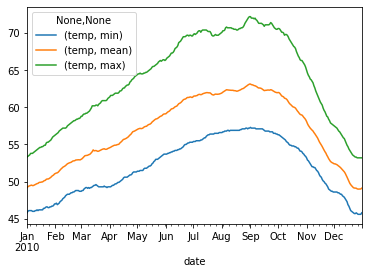

In [68]:
df.drop(columns='month').resample('D').agg(['min','mean','max']).plot()
plt.show()

## Dataset: seattle_weather

In [72]:
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [75]:
df = df.set_index('date')
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### Which year and month combination has the highest amount of precipitation?

In [85]:
df.index.strftime('%Y-%m')

Index(['2012-01', '2012-01', '2012-01', '2012-01', '2012-01', '2012-01',
       '2012-01', '2012-01', '2012-01', '2012-01',
       ...
       '2015-12', '2015-12', '2015-12', '2015-12', '2015-12', '2015-12',
       '2015-12', '2015-12', '2015-12', '2015-12'],
      dtype='object', name='date', length=1461)

In [86]:
df['year_month'] = df.index.strftime('%Y-%b')
df.head()

,precipitation,temp_max,temp_min,wind,weather,year_month
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-Jan
2012-01-02,10.9,10.6,2.8,4.5,rain,2012-Jan
2012-01-03,0.8,11.7,7.2,2.3,rain,2012-Jan
2012-01-04,20.3,12.2,5.6,4.7,rain,2012-Jan
2012-01-05,1.3,8.9,2.8,6.1,rain,2012-Jan


In [95]:
df.groupby('year_month').sum().precipitation.idxmax()

'2015-Dec'

In [96]:
df.groupby('year_month').sum().precipitation.max()

284.5

### Visualize the amount of monthly precipitation over time.

In [99]:
df['month'] = df.index.month_name()
df.head()

,precipitation,temp_max,temp_min,wind,weather,year_month,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-Jan,January
2012-01-02,10.9,10.6,2.8,4.5,rain,2012-Jan,January
2012-01-03,0.8,11.7,7.2,2.3,rain,2012-Jan,January
2012-01-04,20.3,12.2,5.6,4.7,rain,2012-Jan,January
2012-01-05,1.3,8.9,2.8,6.1,rain,2012-Jan,January


In [110]:
# df.groupby('year_month').sum()

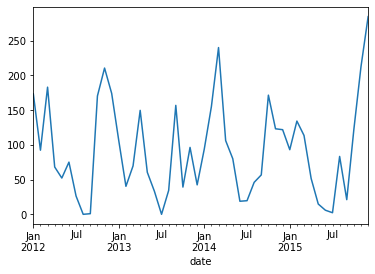

In [108]:
df.resample('M').sum().precipitation.plot()
plt.show()

### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

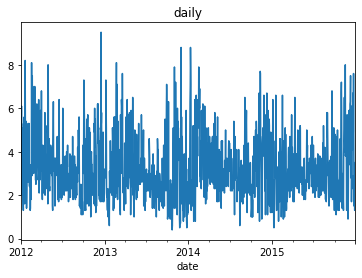

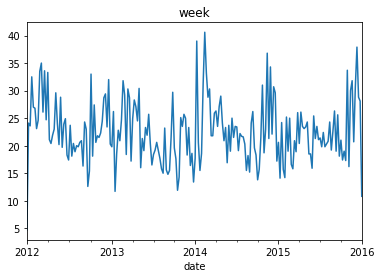

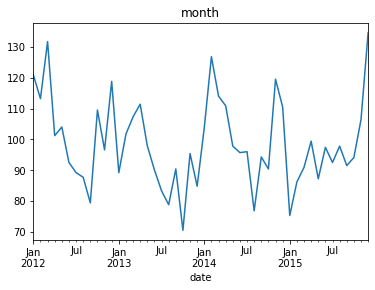

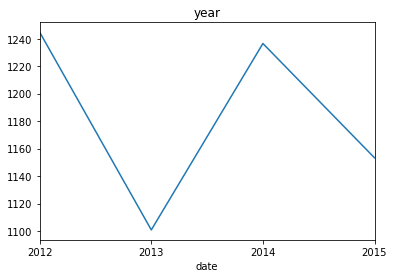

In [120]:
df.resample('D').sum().wind.plot()
plt.title('daily')
plt.show()
df.resample('W').sum().wind.plot()
plt.title('week')
plt.show()
df.resample('M').sum().wind.plot()
plt.title('month')
plt.show()
df.resample('Y').sum().wind.plot()
plt.title('year')
plt.show()

### Which year-month combination is the windiest?

In [124]:
df.groupby('year_month').sum().wind.idxmax()

'2015-Dec'

In [127]:
df.groupby('year_month').sum().wind.max()

134.6

In [128]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,year_month,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-Jan,January
2012-01-02,10.9,10.6,2.8,4.5,rain,2012-Jan,January
2012-01-03,0.8,11.7,7.2,2.3,rain,2012-Jan,January
2012-01-04,20.3,12.2,5.6,4.7,rain,2012-Jan,January
2012-01-05,1.3,8.9,2.8,6.1,rain,2012-Jan,January


### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [129]:
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [130]:
df['is_sunny'] = (df.weather == 'sun')

In [134]:
df['year'] = df.index.year
df.head()

,precipitation,temp_max,temp_min,wind,weather,year_month,month,is_sunny,year
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-Jan,January,False,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,2012-Jan,January,False,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,2012-Jan,January,False,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,2012-Jan,January,False,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,2012-Jan,January,False,2012


In [138]:
df.groupby('year').sum().is_sunny.sort_values().tail(1)

year
2014    211
Name: is_sunny, dtype: int64

### In which month does it rain the most?

In [141]:
df['is_rainy'] = df.weather == 'rain'
df.head()

,precipitation,temp_max,temp_min,wind,weather,year_month,month,is_sunny,year,is_rainy
date,,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-Jan,January,False,2012,False
2012-01-02,10.9,10.6,2.8,4.5,rain,2012-Jan,January,False,2012,True
2012-01-03,0.8,11.7,7.2,2.3,rain,2012-Jan,January,False,2012,True
2012-01-04,20.3,12.2,5.6,4.7,rain,2012-Jan,January,False,2012,True
2012-01-05,1.3,8.9,2.8,6.1,rain,2012-Jan,January,False,2012,True


In [144]:
df.groupby('month').sum().is_rainy.idxmax()

'February'

In [145]:
df.groupby('month').sum().is_rainy.max()

40

### Which month has the most number of days with a non-zero amount of precipitation?

In [148]:
df['is_precipitation'] = df.precipitation > 0

In [149]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,year_month,month,is_sunny,year,is_rainy,is_precipitation
date,,,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-Jan,January,False,2012,False,False
2012-01-02,10.9,10.6,2.8,4.5,rain,2012-Jan,January,False,2012,True,True
2012-01-03,0.8,11.7,7.2,2.3,rain,2012-Jan,January,False,2012,True,True
2012-01-04,20.3,12.2,5.6,4.7,rain,2012-Jan,January,False,2012,True,True
2012-01-05,1.3,8.9,2.8,6.1,rain,2012-Jan,January,False,2012,True,True


In [151]:
df.groupby('month').sum().is_precipitation.idxmax()

'December'

In [152]:
df.groupby('month').sum().is_precipitation.max()

81

## Dataset: flights_20k

In [161]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [163]:
df = df.set_index('date')
df

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK
2001-01-19 13:05:00,-6,1489,SEA,MCI
2001-02-07 11:37:00,-16,1848,MCO,PHX


### Convert any negative delays to 0.

In [164]:
df['delay'] = np.where(df.delay<0, 0, df.delay)
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


### Which hour of the day has the highest average delay?

In [166]:
df['hour'] = df.index.hour
df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21


In [169]:
df.groupby('hour').mean().delay.idxmax()

3

In [170]:
df.groupby('hour').mean().delay.max()

302.5

### Does the day of the week make a difference in the delay amount?

In [173]:
df['weekday'] = df.index.day_name()
df.head()

,delay,distance,origin,destination,hour,weekday
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,21,Friday


In [177]:
df.groupby('weekday').mean().delay.sort_values()

weekday
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

### Does the month make a difference in the delay amount?

In [180]:
df['month'] = df.index.month_name()
df.head()

,delay,distance,origin,destination,hour,weekday,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday,January
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday,January
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday,February
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday,January
2001-03-30 21:45:00,0,229,STL,IND,21,Friday,March


In [181]:
df.groupby('month').mean().delay

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64